# <font color=pink> Statistical learning project </font> #

In [5]:
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib as mpl 
from sklearn.metrics import mean_squared_error
import pandas as pd
import scipy.stats as stats
from sklearn import linear_model
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

## <font color=cyan> 1. Analyse de données </font>

Dans un premier temps, importons le data frame.

In [6]:
df = pd.read_csv('energydata_complete.csv')
df.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [7]:
df.tail()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
19730,2016-05-27 17:20:00,100,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.7,...,23.2,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,2016-05-27 17:30:00,90,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.7,...,23.2,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,2016-05-27 17:40:00,270,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.7,...,23.2,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,2016-05-27 17:50:00,420,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.7,...,23.2,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784
19734,2016-05-27 18:00:00,430,10,25.500000,46.600000,25.264286,42.971429,26.823333,41.156667,24.7,...,23.2,46.8450,22.200000,755.2,57.000000,4.000000,27.000000,13.200000,34.118851,34.118851


In [8]:
print(f"Nombre de variables: {df.shape[1]}, nombre d'observations: {df.shape[0]}")

Nombre de variables: 29, nombre d'observations: 19735


In [9]:
df.duplicated().sum()

0

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   Appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   T1           19735 non-null  float64
 4   RH_1         19735 non-null  float64
 5   T2           19735 non-null  float64
 6   RH_2         19735 non-null  float64
 7   T3           19735 non-null  float64
 8   RH_3         19735 non-null  float64
 9   T4           19735 non-null  float64
 10  RH_4         19735 non-null  float64
 11  T5           19735 non-null  float64
 12  RH_5         19735 non-null  float64
 13  T6           19735 non-null  float64
 14  RH_6         19735 non-null  float64
 15  T7           19735 non-null  float64
 16  RH_7         19735 non-null  float64
 17  T8           19735 non-null  float64
 18  RH_8         19735 non-null  float64
 19  T9  

## <font color=cyan> 2. Train/test split, preprocessing </font>

Séparons nos outputs Y de nos features X.

In [11]:
X = df.iloc[:, 2:]
y = df.iloc[:, 1]

A présent nous pouvons diviser notre data set en un train set (80% de nos données) et un test set (les 20% restant) en utilisant ``train_test_split``.

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)

Preprocessons notre matrice d'input X (standardisons la puis scalons la) en utilisant ``StandardScaler`` afin d'assurer une certaine stabilité dans les modèles que nous implémenterons plus tard dans ce projet.

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [15]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
n, d = X_train.shape

## <font color=cyan> 2. Problème général </font>

Dans un cadre général de régression, nous disposons de données $D_n = \left\{(X_i,Y_i)\right\}_{1\le i\le n}$ où $(X_i,Y_i)_{1\le i\le n}$ sont iid, $X_i\in\mathbb{R}^d$ and $Y_i\in\mathbb{R}$.
Pour une famille de fonctions F donnée, le but est ici de minimiser le risque empirique, c'est à dire de résoudre le problème d'optimisation suivant: 
$$
\widehat f_n\in  \mathrm{argmin}_{f\in\ F}\,\left(n^{-1} \sum_{i=1} ^n (f(X_i) - Y_i)^2 \right)\,.
$$

## <font color=cyan> 3. Régression linéaire </font>

Dans un cadre de régression linéaire correctement spécifié, nous allons supposer que f est une fonction linéaire et que le modèle est ainsi de la forme:
$$Y = X \theta_{\star} + \varepsilon\,.$$
where :
 - $Y\in\mathbb{R}^n$ le vecteur aléatoire d'observations
 - $X\in\mathbb{R}^{n\times d}$ la matrice d'inputs/features
 - $\varepsilon\ \sim \mathcal{N}(0,\,\sigma_{\star}^{2}I_n)$ où $\sigma_{\star}$ est connu
 - $\theta_{\star}\in\mathbb{R}^d$ le vecteur de coefficients inconnu que l'on cherche à déterminer.

### <font color=darkcyan> 2.1 Regression linaire multivariée à rang plein </font>

Etant donné que nous disposons de beaucoup plus d'observations que de variable, il semble pertinent de supposer que X est une matrice de rang plein dans un premier temps (ie $X^\top X$ est inversible). 

L'estimateur des moindres carrés $\theta_{\star}$ est défini comme solution de:

$$
\widehat \theta_n\in  \mathrm{argmin}_{\theta\in\mathbb{R}^d}\,\left( \|Y - X\theta\|_2^2 \right)\,.
$$

Dans ce cas,  $\widehat \theta_n = (X^\top X)^{-1}X^\top Y$ 

In [11]:
linreg = linear_model.LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = linreg.predict(X_test)

Text(0.5, 1.0, 'Predictions compared to actual test values')

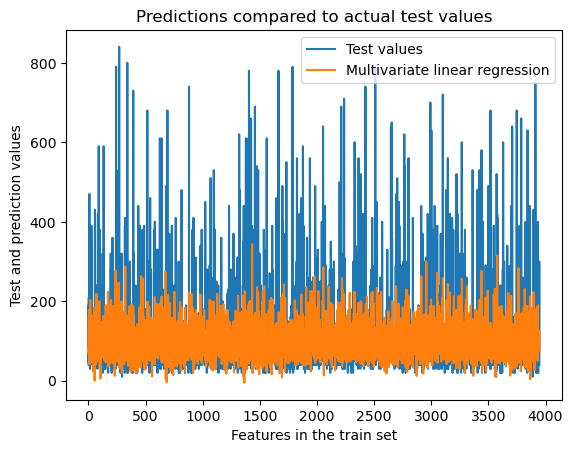

In [13]:
plt.figure()
plt.plot(y_test.values)
plt.plot(y_pred)
plt.xlabel('Features in the train set')
plt.ylabel('Test and prediction values')
plt.legend(labels=('Test values','Multivariate linear regression'))
plt.title('Predictions compared to actual test values')

Ce graphe ne ressemble pas à grand chose: on devine cependant une performance assez mauvaise de l'estimateur. Zoomons un peu pour avoir une meilleure idée de ce qui se passe localement.

(0.0, 100.0, 0.0, 200.0)

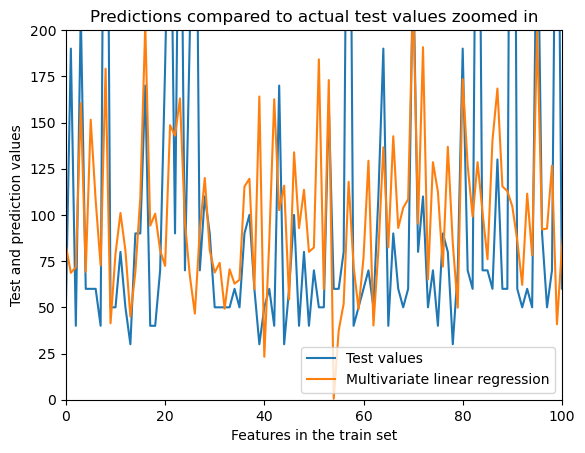

In [14]:
plt.figure()
plt.plot(y_test.values)
plt.plot(y_pred)
plt.xlabel('Features in the train set')
plt.ylabel('Test and prediction values')
plt.legend(labels=('Test values','Multivariate linear regression'))
plt.title('Predictions compared to actual test values zoomed in')
plt.axis([0, 100, 0, 200])

In [15]:
mse = mean_squared_error(y_test, y_pred)
print('MSE =', mse)

MSE = 8697.38073856249


Sans grande surprise, ce modèle est plutôt mauvais, ce qui peut être expliqué par une variété de raisons:
- l'hypothèse que $X^t X$ est inversible est très forte et souvent pas vérifiée.
- nos données ne suivent tout simplement pas un modèle linéaire.

### <font color=darkcyan> 2.2 Regression linéaire avec pénalisation Ridge </font>

In [28]:
np.linalg.det(X_train.T @ X_train)
# X.T @ X n'est pas inversible...

0.0

Dans ce cas, cependant, $X^\top X$ n'est pas inversible, donc le modèle linéaire sans pénalisation n'est pas adapté..

Une manière de contourner ce problème est d'ajouter un pénalisation Ridge, c'est à dire introduire un hyperparamètre $\lambda>0$. L'estimateur des moindres carrés pénalisé $\theta_{\star}$ est alors défini par: 

$$
\widehat \theta_{n,\lambda}^{Ridge}\in  \mathrm{argmin}_{\theta\in\mathbb{R}^d}\,\left( \|Y - X\theta\|_2^2 + \lambda \|\theta\|_2^2\right)
$$

Dans ce cas, $n^{-1}X^\top X + \lambda I_n$ est symétrique définie positive, et donc inversible.


$\widehat \theta_{n,\lambda}^{Ridge} = n^{-1}(n^{-1} X^\top X + \lambda I_n)^{-1}X^\top Y$

Cherchons la meilleure valeur de lambda (celle qui minimise la MSE) en performant une grid search avec validation croisée intégrée en utilisant ``GridSearchCV``.

In [17]:
model = linear_model.Ridge()
param_grid={"alpha": np.logspace(-2, 6, num=200)}
gscv = GridSearchCV(model, param_grid, cv=5)
gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([1.00000000e-02, 1.09698580e-02, 1.20337784e-02, 1.32008840e-02,
       1.44811823e-02, 1.58856513e-02, 1.74263339e-02, 1.91164408e-02,
       2.09704640e-02, 2.30043012e-02, 2.52353917e-02, 2.76828663e-02,
       3.03677112e-02, 3.33129479e-02, 3.65438307e-02, 4.00880633e-02,
       4.39760361e-02, 4.82410870e-02, 5.29197874e-02, 5....
       1.18953407e+05, 1.30490198e+05, 1.43145894e+05, 1.57029012e+05,
       1.72258597e+05, 1.88965234e+05, 2.07292178e+05, 2.27396575e+05,
       2.49450814e+05, 2.73644000e+05, 3.00183581e+05, 3.29297126e+05,
       3.61234270e+05, 3.96268864e+05, 4.34701316e+05, 4.76861170e+05,
       5.23109931e+05, 5.73844165e+05, 6.29498899e+05, 6.90551352e+05,
       7.57525026e+05, 8.30994195e+05, 9.11588830e+05, 1.00000000e+06])})

In [18]:
y_pred = gscv.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [19]:
print(f'Best parameters = {gscv.best_params_}, MSE = {mse}')
print(f'Best score = {gscv.best_score_}')

Best parameters = {'alpha': 3.107866187782014}, MSE = 8698.128360821976
Best score = 0.16103411050361346


In [20]:
p = 200
alphas = np.logspace(-2, 7, p)
mse = []
coefficients = []
for i in range(p):
    ridge = linear_model.Ridge(alphas[i])
    ridge.fit(X_train, y_train)
    y_pred = ridge.predict(X_test)
    coeff = ridge.coef_
    zeros = np.sum(coeff == 0)
    coefficients.append(coeff)
    mse.append(mean_squared_error(y_test, y_pred))

Text(0.5, 1.0, 'Estimated parameters vs penalty parameters')

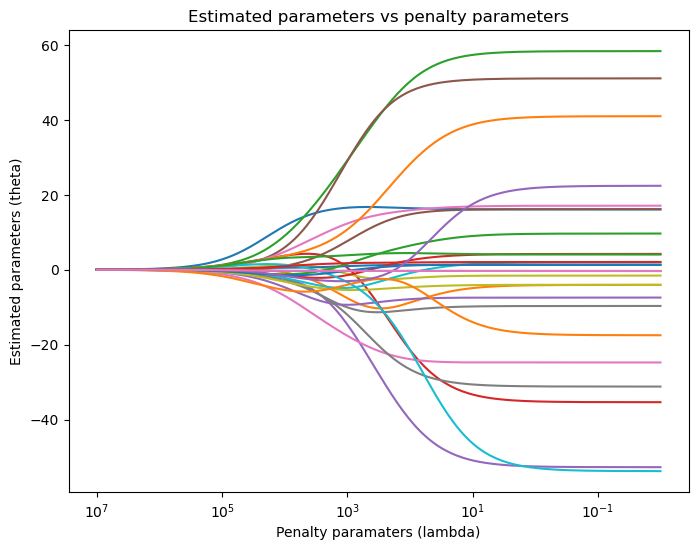

In [21]:
plt.figure(figsize=(8,6))
plt.plot(alphas, coefficients)
ax = plt.gca()
plt.xlabel("Penalty parameters (lambda)")
plt.ylabel("Estimated parameters (theta)")
plt.xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])
plt.title("Estimated parameters vs penalty parameters")

Lorsque lambda est très grand, il y a une forte pénalisation, ce qui fait converger les coefficients vers zéro. Cela simplifie le modèle, mais au prix d’une perte d’information et d’un potentiel sous-ajustement des données.

Lorsque lambda est très faible cependant la régularisation est quasi inexistante. Les coefficients prennent alors des valeurs plus grandes et varient davantage, ce qui permet une plus grande flexibilité. Bémol: cela rend le modèle plus sensible au bruit des données d’entraînement.

D'où l'utilité de la grid search et validation croisée pour sélectionner le lambda qui offre le meilleur compromis biais variance. 

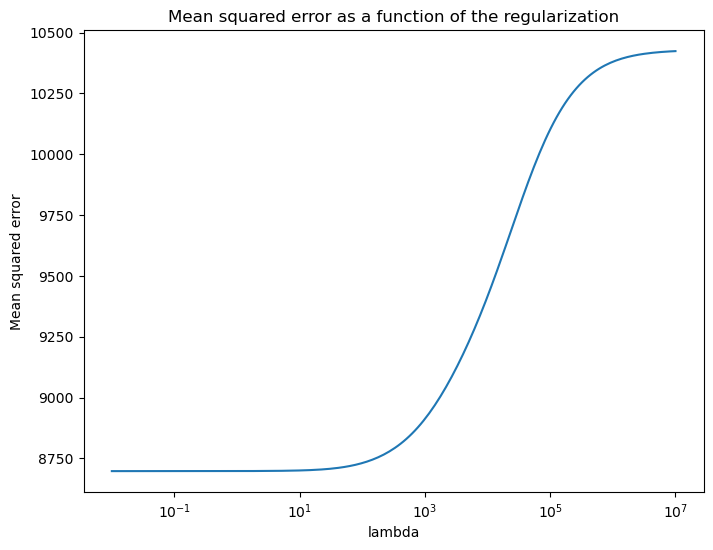

In [22]:
plt.figure(1,figsize=(8,6))
plt.plot(alphas, mse)
plt.xscale('log')
plt.xlabel("lambda")
plt.ylabel('Mean squared error')
plt.title("Mean squared error as a function of the regularization")
plt.axis("tight")
plt.show()

Plus lambda augmente, plus l'erreur augmente. Le lambda optimal se trouve donc avant $10^2$

## <font color=cyan> 3. Regression à base de noyaux </font>

Etant donné que notre modèle semble peu adapté à un problème de régression linéaire, essayons une approche différente. ``KernelRidge`` combine la pénalisation Ridge avec une régression kernel-based.


Soit $k:\mathbb{R}^d\times\mathbb{R}^d:\to \mathbb{R}$ un noyau défini positif et $\mathcal{F}$ le RKHS de noyau $k$. On cherche alors à résoudre le problème suivant:

$$
\widehat f^n_{\mathcal{F}} \in \underset{f\in\mathcal{F}}{\mathrm{argmin}}\;\frac{1}{n}\sum_{i=1}^n (Y_i - f(X_i))^2 + \lambda\|f\|_\mathcal{F}^2\,,
$$

où $\widehat f^n_{\mathcal{F}} : x \mapsto \sum_{i=1}^n \widehat \alpha_i k(X_i,x)$, ce qui revient à chercher:

$$
\widehat\alpha \in \underset{\alpha \in (\mathbb{R}^d)^n}{\mathrm{argmin}}\;\left\{ \frac{1}{n}\|Y - K\alpha\|^2_2 + \lambda \alpha^TK\alpha\right\}\,,
$$

où $K = (k(X_i,X_j))_{1\leqslant i,j \leqslant n}$.

Une fois la matrice $K$ construite, la regression à base de noyaux Ridge revient à la résolution du problème ci-dessus $\widehat \alpha$. 

In [13]:
#On définit les distributions sur lesquels nous chercherons nos paramètres ainsi que les kernels à tester

param_distrib = {
            'alpha': stats.loguniform(1e-2, 1e1),
            'kernel': ['rbf', 'sigmoid'],
            'gamma': stats.loguniform(1e-4, 1e1)}


In [14]:
#peu d'itérations car sinon ça tourne pendant des heures...
model = KernelRidge()
kernel_ridge = RandomizedSearchCV(model, param_distributions=param_distrib, cv=3, n_iter=10, random_state=42)
kernel_ridge.fit(X_train, y_train)

/Users/yasmineparent/opt/anaconda3/envs/maths/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/yasmineparent/opt/anaconda3/envs/maths/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/yasmineparent/opt/anaconda3/envs/maths/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/yasmineparent/opt/anaconda3/envs/maths/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/Users/yasmineparent/opt/anaconda3/envs/maths/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:250: UserWarning: S

RandomizedSearchCV(cv=3, estimator=KernelRidge(),
                   param_distributions={'alpha': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff0b0263760>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x7ff0aebdda00>,
                                        'kernel': ['rbf', 'sigmoid']},
                   random_state=42)

In [15]:
y_pred = kernel_ridge.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

In [16]:
print(f'Best parameters = {kernel_ridge.best_params_}, MSE = {mse}')
print(f'Best score = {kernel_ridge.best_score_}')

Best parameters = {'alpha': 0.10025956902289568, 'gamma': 0.0005180051644243015, 'kernel': 'rbf'}, MSE = 8397.512493719543
Best score = 0.17703239700611792


Text(0.5, 1.0, 'Predictions compared to actual test values')

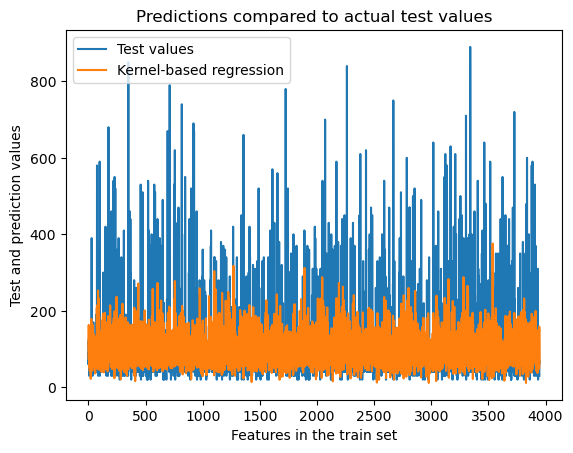

In [17]:
plt.figure()
plt.plot(y_test.values)
plt.plot(y_pred)
plt.xlabel('Features in the train set')
plt.ylabel('Test and prediction values')
plt.legend(labels=('Test values','Kernel-based regression'))
plt.title('Predictions compared to actual test values')

La MSE est légèrement meilleure: cependant, la Grid Search tourne extrêmement lentement, du fait du coût des méthodes à base de noyaux.

## <font color=cyan> 4. Réseau de neurones dense </font>

In [3]:
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
input_d = d
hidden_d = 100

In [ ]:
model = Sequential()
model.add(Dense(input_d, input_shape=(input_d,), activation = 'sigmoid'))
model.add(Dense(hidden_d, activation = 'sigmoid'))
model.add(Dense(1))

In [ ]:
model.compile(optimizer='adam', loss='mse')